<a href="https://colab.research.google.com/github/pnn99/detector_fraude_LLM/blob/main/detector_de_fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download


In [33]:
# !pip install pandas
# !pip install numpy
# !pip install scikit-learn

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [35]:
df_credit = pd.read_csv('creditcard.csv')
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [36]:
#verificação de tipos e valores nulos
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [37]:
#verifica os tipos dos dados não fraude
df_nao_fraude = df_credit.Amount[df_credit.Class == 0]
df_nao_fraude.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [38]:
#verifica os tipos dos dados de fraude
df_fraude = df_credit.Amount[df_credit.Class == 1]
df_fraude.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [39]:
# Contagem das classes (fraude e não fraude)
df_credit.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [40]:
#Criação de um novo dataset para utilizar um undersampling para igualar a nossa base de dados
df_fraude = df_credit[df_credit.Class == 1]
df_nao_fraude = df_credit[df_credit.Class == 0]

df_undersampling = df_nao_fraude.sample(n=492)
df_undersampling

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
261386,159989.0,-0.458755,-0.289801,0.797962,-1.432532,-0.966832,-0.405427,-0.676250,0.556377,-1.076262,...,0.527268,1.214486,-0.030162,0.041753,-0.251034,-0.058973,-0.057601,-0.068463,49.98,0
195548,131113.0,-3.056088,2.131639,-3.015018,-1.945885,1.872757,3.100673,-0.580775,1.939819,0.995095,...,-0.482143,-0.836623,0.512073,0.668501,-0.004855,0.167028,0.300662,0.104037,11.99,0
12665,22200.0,1.218240,0.898736,-0.051405,1.624598,0.064139,-1.366742,0.274946,-0.387645,1.063156,...,-0.188563,-0.189531,-0.080127,0.536865,0.648762,-0.388602,0.013628,0.055932,1.00,0
221576,142615.0,-0.493556,0.118348,-0.864176,-0.285071,3.505354,3.580538,0.510257,0.734779,-1.418227,...,0.262442,0.610196,0.170461,0.802381,-0.919482,2.244574,0.064321,0.029507,75.66,0
141226,84191.0,-1.058603,0.551076,0.305733,-1.919401,0.411165,-0.566858,-0.147542,-2.921122,0.651478,...,-1.159555,1.031992,0.194302,-0.025642,-0.178926,-0.879555,-0.149750,0.028571,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284608,172599.0,-0.195044,1.238305,-0.768720,-0.178302,0.582600,-1.282570,0.946855,-0.129767,-0.040571,...,0.365673,1.207021,-0.111128,-0.162594,-0.896012,-0.259841,-0.131265,-0.005010,18.16,0
40879,40441.0,0.954599,-0.064924,0.405458,1.189322,-0.348816,-0.221166,0.052627,0.115589,-0.191118,...,-0.044942,-0.394352,0.031809,0.171325,0.250999,-0.553813,0.006093,0.028722,95.00,0
284780,172766.0,-1.727503,1.108356,2.219561,1.148583,-0.884199,0.793083,-0.527298,0.866429,0.853819,...,-0.094708,0.236818,-0.204280,1.158185,0.627801,-0.399981,0.510818,0.233265,30.00,0
267084,162603.0,-0.952407,1.660677,-1.612833,-1.535304,1.321184,-0.720633,1.334303,0.058350,-0.009768,...,0.155371,0.811540,-0.237020,0.161614,-0.128800,0.062368,0.411139,0.164082,7.32,0


In [41]:
#concaternar dos dataframes
df_concatenado = pd.concat([df_undersampling, df_fraude], axis=0)
df_concatenado

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
261386,159989.0,-0.458755,-0.289801,0.797962,-1.432532,-0.966832,-0.405427,-0.676250,0.556377,-1.076262,...,0.527268,1.214486,-0.030162,0.041753,-0.251034,-0.058973,-0.057601,-0.068463,49.98,0
195548,131113.0,-3.056088,2.131639,-3.015018,-1.945885,1.872757,3.100673,-0.580775,1.939819,0.995095,...,-0.482143,-0.836623,0.512073,0.668501,-0.004855,0.167028,0.300662,0.104037,11.99,0
12665,22200.0,1.218240,0.898736,-0.051405,1.624598,0.064139,-1.366742,0.274946,-0.387645,1.063156,...,-0.188563,-0.189531,-0.080127,0.536865,0.648762,-0.388602,0.013628,0.055932,1.00,0
221576,142615.0,-0.493556,0.118348,-0.864176,-0.285071,3.505354,3.580538,0.510257,0.734779,-1.418227,...,0.262442,0.610196,0.170461,0.802381,-0.919482,2.244574,0.064321,0.029507,75.66,0
141226,84191.0,-1.058603,0.551076,0.305733,-1.919401,0.411165,-0.566858,-0.147542,-2.921122,0.651478,...,-1.159555,1.031992,0.194302,-0.025642,-0.178926,-0.879555,-0.149750,0.028571,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [42]:
#ajustar o Index
df_concatenado.reset_index(drop=True, inplace=True)
df_concatenado

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,159989.0,-0.458755,-0.289801,0.797962,-1.432532,-0.966832,-0.405427,-0.676250,0.556377,-1.076262,...,0.527268,1.214486,-0.030162,0.041753,-0.251034,-0.058973,-0.057601,-0.068463,49.98,0
1,131113.0,-3.056088,2.131639,-3.015018,-1.945885,1.872757,3.100673,-0.580775,1.939819,0.995095,...,-0.482143,-0.836623,0.512073,0.668501,-0.004855,0.167028,0.300662,0.104037,11.99,0
2,22200.0,1.218240,0.898736,-0.051405,1.624598,0.064139,-1.366742,0.274946,-0.387645,1.063156,...,-0.188563,-0.189531,-0.080127,0.536865,0.648762,-0.388602,0.013628,0.055932,1.00,0
3,142615.0,-0.493556,0.118348,-0.864176,-0.285071,3.505354,3.580538,0.510257,0.734779,-1.418227,...,0.262442,0.610196,0.170461,0.802381,-0.919482,2.244574,0.064321,0.029507,75.66,0
4,84191.0,-1.058603,0.551076,0.305733,-1.919401,0.411165,-0.566858,-0.147542,-2.921122,0.651478,...,-1.159555,1.031992,0.194302,-0.025642,-0.178926,-0.879555,-0.149750,0.028571,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [43]:
#retirar dados para validação
df_val_nao_fraude = df_concatenado.head(5)
df_val_nao_fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,159989.0,-0.458755,-0.289801,0.797962,-1.432532,-0.966832,-0.405427,-0.676250,0.556377,-1.076262,...,0.527268,1.214486,-0.030162,0.041753,-0.251034,-0.058973,-0.057601,-0.068463,49.98,0
1,131113.0,-3.056088,2.131639,-3.015018,-1.945885,1.872757,3.100673,-0.580775,1.939819,0.995095,...,-0.482143,-0.836623,0.512073,0.668501,-0.004855,0.167028,0.300662,0.104037,11.99,0
2,22200.0,1.218240,0.898736,-0.051405,1.624598,0.064139,-1.366742,0.274946,-0.387645,1.063156,...,-0.188563,-0.189531,-0.080127,0.536865,0.648762,-0.388602,0.013628,0.055932,1.00,0
3,142615.0,-0.493556,0.118348,-0.864176,-0.285071,3.505354,3.580538,0.510257,0.734779,-1.418227,...,0.262442,0.610196,0.170461,0.802381,-0.919482,2.244574,0.064321,0.029507,75.66,0
4,84191.0,-1.058603,0.551076,0.305733,-1.919401,0.411165,-0.566858,-0.147542,-2.921122,0.651478,...,-1.159555,1.031992,0.194302,-0.025642,-0.178926,-0.879555,-0.149750,0.028571,1.00,0


In [44]:
df_val_fraude = df_concatenado.tail(5)
df_val_fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
983,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [45]:
df_concatenado.drop(df_concatenado.head(5).index, inplace=True)
df_concatenado.drop(df_concatenado.tail(5).index, inplace=True)
df_concatenado

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5,159920.0,-0.726084,0.365505,2.023113,-0.501686,0.726820,-0.172525,0.466173,-0.123878,0.260048,...,-0.241960,-0.559906,-0.323243,-0.682205,0.392961,-0.404943,-0.098622,-0.147748,5.00,0
6,45820.0,-0.440145,-0.875764,2.822620,-1.592103,-1.729613,1.214532,-1.446361,0.518211,-1.084144,...,-0.066023,0.661176,-0.148561,0.063725,-0.369155,-0.117677,0.124132,0.126714,12.90,0
7,126159.0,2.027612,-0.823871,-1.614880,-0.352191,-0.429910,-1.014746,-0.002669,-0.289065,-0.806834,...,-0.310605,-0.419535,0.124791,0.023435,-0.062972,0.653137,-0.096913,-0.074644,66.97,0
8,131933.0,1.823144,-1.909964,-1.044594,-2.041021,-1.523861,-0.689420,-0.807699,0.041452,1.278227,...,-0.654000,-1.676898,0.323499,-0.465667,-0.641876,-0.667820,-0.003139,-0.026186,174.23,0
9,139492.0,-0.688540,0.035065,0.251140,-0.672439,0.684762,-0.285620,1.301766,-0.016258,-0.518587,...,0.010715,-0.336395,0.383601,0.745872,-0.455894,0.139236,0.021903,0.178390,156.55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,165981.0,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,-1.076274,...,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,0.00,1
975,166028.0,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,...,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,39.90,1
976,166831.0,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,...,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,634.30,1
977,166883.0,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,19.95,1


In [46]:
#concatenar o dataframe de validação
df_val_total = pd.concat([df_val_nao_fraude, df_val_fraude], axis=0)
df_val_total.reset_index(inplace=True)

df_val_total_real = df_val_total.Class
df_val_total = df_val_total.drop(['index','Time','Class'], axis=1)
df_val_total

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.458755,-0.289801,0.797962,-1.432532,-0.966832,-0.405427,-0.676250,0.556377,-1.076262,0.057954,...,0.111850,0.527268,1.214486,-0.030162,0.041753,-0.251034,-0.058973,-0.057601,-0.068463,49.98
1,-3.056088,2.131639,-3.015018,-1.945885,1.872757,3.100673,-0.580775,1.939819,0.995095,1.562746,...,0.322749,-0.482143,-0.836623,0.512073,0.668501,-0.004855,0.167028,0.300662,0.104037,11.99
2,1.218240,0.898736,-0.051405,1.624598,0.064139,-1.366742,0.274946,-0.387645,1.063156,-1.073674,...,-0.105930,-0.188563,-0.189531,-0.080127,0.536865,0.648762,-0.388602,0.013628,0.055932,1.00
3,-0.493556,0.118348,-0.864176,-0.285071,3.505354,3.580538,0.510257,0.734779,-1.418227,0.919858,...,0.419395,0.262442,0.610196,0.170461,0.802381,-0.919482,2.244574,0.064321,0.029507,75.66
4,-1.058603,0.551076,0.305733,-1.919401,0.411165,-0.566858,-0.147542,-2.921122,0.651478,-1.527095,...,0.397397,-1.159555,1.031992,0.194302,-0.025642,-0.178926,-0.879555,-0.149750,0.028571,1.00
5,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
6,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
7,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
8,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00
9,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53


In [47]:
#verificar a distribuição dos dados fraude/não fraude
df_concatenado.Class.value_counts()

Class
0    487
1    487
Name: count, dtype: int64

In [48]:
#separar labels e features
X = df_concatenado.drop(['Time','Class'], axis=1)
Y = df_concatenado['Class']

In [49]:
print(X, Y)

           V1        V2        V3        V4        V5        V6        V7  \
5   -0.726084  0.365505  2.023113 -0.501686  0.726820 -0.172525  0.466173   
6   -0.440145 -0.875764  2.822620 -1.592103 -1.729613  1.214532 -1.446361   
7    2.027612 -0.823871 -1.614880 -0.352191 -0.429910 -1.014746 -0.002669   
8    1.823144 -1.909964 -1.044594 -2.041021 -1.523861 -0.689420 -0.807699   
9   -0.688540  0.035065  0.251140 -0.672439  0.684762 -0.285620  1.301766   
..        ...       ...       ...       ...       ...       ...       ...   
974 -5.766879 -8.402154  0.056543  6.950983  9.880564 -5.773192 -5.748879   
975 -0.956390  2.361594 -3.171195  1.970759  0.474761 -1.902598 -0.055178   
976 -2.027135 -1.131890 -1.135194  1.086963 -0.010547  0.423797  3.790880   
977  2.091900 -0.757459 -1.192258 -0.755458 -0.620324 -0.322077 -1.082511   
978 -1.374424  2.793185 -4.346572  2.400731 -1.688433  0.111136 -0.922038   

           V8        V9       V10  ...       V20       V21       V22  \
5  

In [50]:
#separar entre dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 42)

In [51]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# ---------------------------------------------------------------------------------
# PASSO 1: Definir os modelos de base (Nível 0 - Os "Especialistas")
# ---------------------------------------------------------------------------------
# Criamos uma lista de tuplas com o nome e o objeto de cada modelo.
base_models = [
    ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
]

# ---------------------------------------------------------------------------------
# PASSO 2: Definir o Metaclassificador (Nível 1 - O "Gerente")
# ---------------------------------------------------------------------------------
# Usaremos uma Regressão Logística para combinar as previsões dos especialistas.
meta_classifier = LogisticRegression(random_state=42)

# ---------------------------------------------------------------------------------
# PASSO 3: Criar o Stacking Classifier
# ---------------------------------------------------------------------------------
# Juntamos tudo no StackingClassifier.
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_classifier,
    cv=5
)

# ---------------------------------------------------------------------------------
# PASSO 4: Treinar e Avaliar o modelo Stacking
# ---------------------------------------------------------------------------------
print("--- Treinando o StackingClassifier ---")
stacking_model.fit(x_train, y_train)
y_pred_stacking = stacking_model.predict(x_test)
acc_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Acurácia do StackingClassifier: {acc_stacking * 100:.2f}%\\n")
print("Relatório de Classificação do StackingClassifier:")
print(classification_report(y_test, y_pred_stacking))


# ---------------------------------------------------------------------------------
# PASSO 5: Treinar e Avaliar cada modelo de base para comparação
# ---------------------------------------------------------------------------------
print("\\n--- Acurácia dos Modelos de Base (Individuais) ---")
# Criamos um dicionário para guardar os resultados para o gráfico depois
model_accuracies = {}

for name, model in base_models:
    model.fit(x_train, y_train)
    y_pred_base = model.predict(x_test)
    acc_base = accuracy_score(y_test, y_pred_base)
    model_accuracies[name] = acc_base # Guarda a acurácia
    print(f"Acurácia do modelo '{name}': {acc_base * 100:.2f}%")

model_accuracies['stacking'] = acc_stacking

--- Treinando o StackingClassifier ---


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documenta

Acurácia do StackingClassifier: 93.85%\n
Relatório de Classificação do StackingClassifier:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        98
           1       0.96      0.92      0.94        97

    accuracy                           0.94       195
   macro avg       0.94      0.94      0.94       195
weighted avg       0.94      0.94      0.94       195

\n--- Acurácia dos Modelos de Base (Individuais) ---


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia do modelo 'logistic_regression': 92.82%
Acurácia do modelo 'decision_tree': 88.21%
Acurácia do modelo 'random_forest': 95.38%
Acurácia do modelo 'svc': 61.54%
Acurácia do modelo 'gradient_boosting': 94.36%


In [52]:
# --- Validação Comparativa (1ª Rodada - Modelos Padrão) ---

# 1. Criar o DataFrame para os resultados desta rodada
df_validacao_rodada1 = pd.DataFrame({'Real': df_val_total_real})

# 2. Reinstanciar e treinar os modelos com parâmetros padrão
#    para garantir que estamos usando as versões não otimizadas.

# Lista dos modelos de base padrão
base_models_padrao = [
    ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
]

# Treinando cada modelo individualmente e fazendo a previsão
print("--- Gerando previsões para os modelos padrão individuais ---")
for name, model in base_models_padrao:
    model.fit(x_train, y_train)
    df_validacao_rodada1[f'Prev ({name})'] = model.predict(df_val_total)

# 3. Treinar o StackingClassifier com os modelos padrão e fazer a previsão
print("--- Gerando previsões para o StackingClassifier padrão ---")
stacking_model_padrao = StackingClassifier(
    estimators=base_models_padrao,
    final_estimator=LogisticRegression(random_state=42),
    cv=5,
    n_jobs=-1
)
stacking_model_padrao.fit(x_train, y_train)
df_validacao_rodada1['Prev (STACKING PADRÃO)'] = stacking_model_padrao.predict(df_val_total)

colunas_ordenadas = [
    'Real',
    'Prev (logistic_regression)',
    'Prev (random_forest)',
    'Prev (svc)',
    'Prev (gradient_boosting)',
    'Prev (STACKING PADRÃO)',
    'Prev (decision_tree)'
]
df_validacao_rodada1 = df_validacao_rodada1[colunas_ordenadas]

print("\n--- Painel de Validação (1ª Rodada - Modelos Padrão) ---")
df_validacao_rodada1

--- Gerando previsões para os modelos padrão individuais ---


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Gerando previsões para o StackingClassifier padrão ---

--- Painel de Validação (1ª Rodada - Modelos Padrão) ---


,Real,Prev (logistic_regression),Prev (random_forest),Prev (svc),Prev (gradient_boosting),Prev (STACKING PADRÃO),Prev (decision_tree)
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,1,1,1,1,1,1,1
6,1,1,1,0,1,1,1
7,1,1,1,0,1,1,1
8,1,1,1,0,1,1,1
9,1,0,0,0,0,0,0


\n==================================================
INICIANDO ANÁLISE VISUAL DA 1ª RODADA (MODELOS PADRÃO)
==================================================\n


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


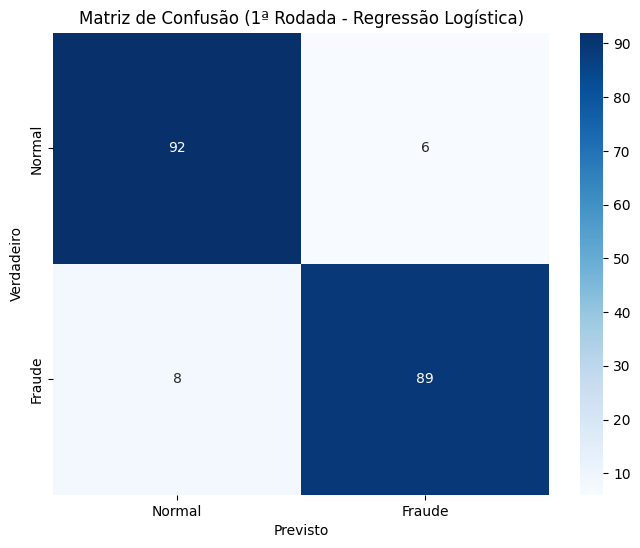

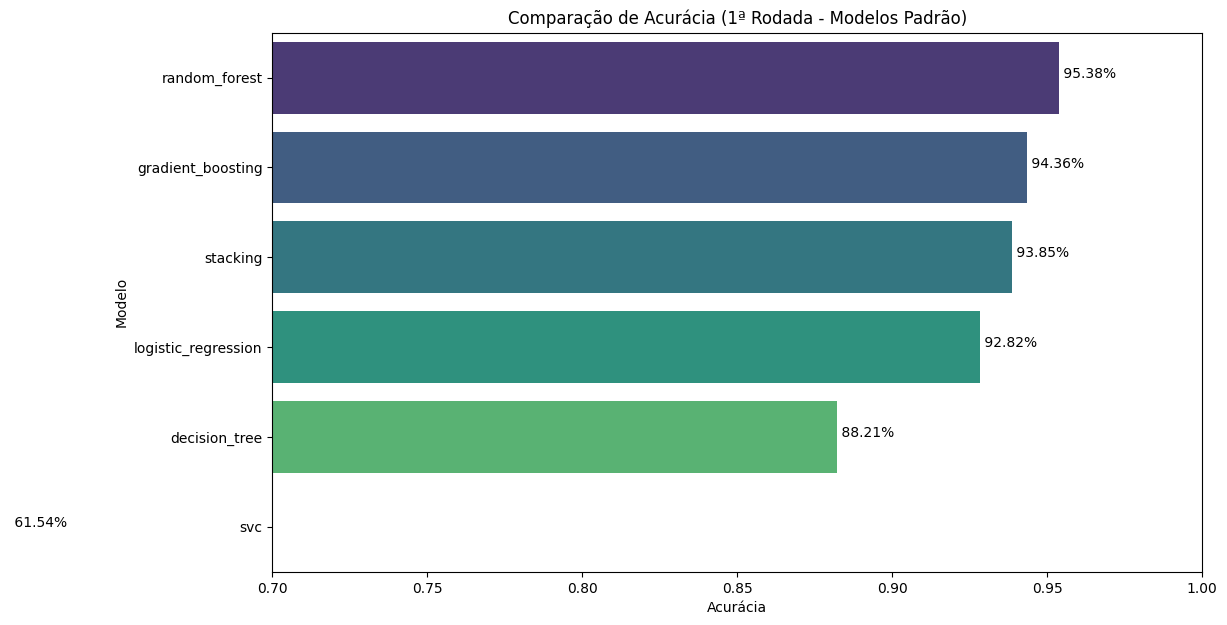

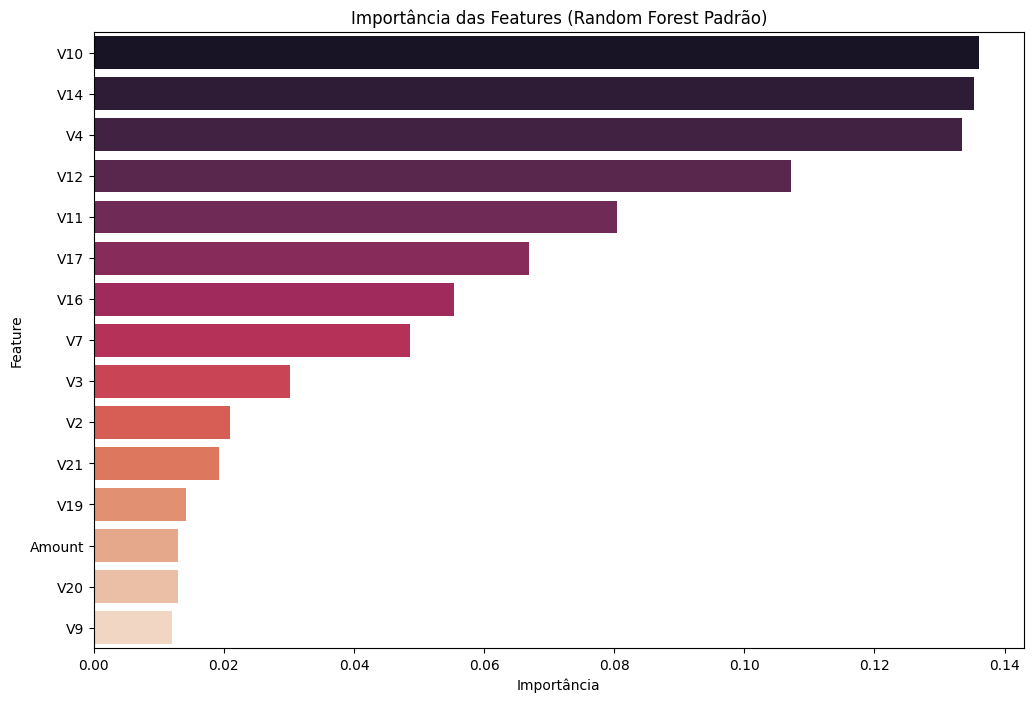

In [53]:
# --- GRÁFICOS E ANÁLISES DA 1ª RODADA (MODELOS PADRÃO) ---

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("\\n" + "="*50)
print("INICIANDO ANÁLISE VISUAL DA 1ª RODADA (MODELOS PADRÃO)")
print("="*50 + "\\n")


# --- Gráfico 1: Matriz de Confusão (Regressão Logística Padrão) ---
best_model_round1 = LogisticRegression(max_iter=1000, random_state=42)
best_model_round1.fit(x_train, y_train)
y_pred_round1 = best_model_round1.predict(x_test)

cm_round1 = confusion_matrix(y_test, y_pred_round1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_round1, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraude'], yticklabels=['Normal', 'Fraude'])
plt.title('Matriz de Confusão (1ª Rodada - Regressão Logística)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.savefig('confusion_matrix_round1.png')
plt.show()


# --- Gráfico 2: Comparação de Acurácia dos Modelos (Padrão) ---

# Usando o dicionário 'model_accuracies' que foi criado na célula anterior
df_accuracies_round1 = pd.DataFrame(list(model_accuracies.items()), columns=['Modelo', 'Acurácia']).sort_values('Acurácia', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='Acurácia', y='Modelo', data=df_accuracies_round1, palette='viridis', orient='h', hue='Modelo', legend=False)
plt.title('Comparação de Acurácia (1ª Rodada - Modelos Padrão)')
plt.xlabel('Acurácia')
plt.ylabel('Modelo')
plt.xlim(0.7, 1.0) # Ajuste para dar destaque
for index, value in enumerate(df_accuracies_round1['Acurácia']):
    plt.text(value, index, f' {value*100:.2f}%')
plt.savefig('accuracy_comparison_round1.png')
plt.show()

# --- Gráfico 3: Importância das Features (Random Forest Padrão) ---

# Usando o modelo RandomForest com parâmetros padrão treinado na célula anterior
rf_model_padrao = RandomForestClassifier(random_state=42)
rf_model_padrao.fit(x_train, y_train)

feature_importances_padrao = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model_padrao.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_padrao.head(15), palette='rocket', orient='h', hue='feature', legend=False)
plt.title('Importância das Features (Random Forest Padrão)')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.savefig('feature_importance_round1.png')
plt.show()


In [54]:
from sklearn.model_selection import GridSearchCV

# --- PASSO 1: Otimização do RandomForestClassifier ---

print("--- Iniciando a Otimização para o RandomForestClassifier ---")

# Definindo o "cardápio" de parâmetros que o GridSearchCV vai testar
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Número de árvores
    'max_depth': [10, 20, 30],         # Profundidade máxima
    'criterion': ['gini', 'entropy']     # Critério de divisão
}

# Configurando o GridSearchCV
# cv=5 significa que usaremos validação cruzada de 5 folds
# n_jobs=-1 usa todos os processadores disponíveis para acelerar o processo
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Rodando a busca pelos melhores parâmetros
grid_search_rf.fit(x_train, y_train)

print("\n--- Otimização do RandomForestClassifier Concluída! ---")
print(f"Melhores parâmetros encontrados: {grid_search_rf.best_params_}")

# Guardando o melhor modelo encontrado
best_rf = grid_search_rf.best_estimator_

# --- PASSO 2: Otimização do SVC ---

print("\n--- Iniciando a Otimização para o SVC ---")

# "Cardápio" de parâmetros para o SVC
param_grid_svc = {
    'C': [0.1, 1, 10],            # Parâmetro de regularização
    'gamma': ['scale', 'auto'],     # Coeficiente do kernel
    'kernel': ['rbf']               # Vamos focar no kernel RBF que é muito poderoso
}

# Configurando o GridSearchCV para o SVC
grid_search_svc = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid_svc,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Rodando a busca
grid_search_svc.fit(x_train, y_train)

print("\n--- Otimização do SVC Concluída! ---")
print(f"Melhores parâmetros encontrados: {grid_search_svc.best_params_}")

# Guardando o melhor modelo SVC
best_svc = grid_search_svc.best_estimator_

--- Iniciando a Otimização para o RandomForestClassifier ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits

--- Otimização do RandomForestClassifier Concluída! ---
Melhores parâmetros encontrados: {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 200}

--- Iniciando a Otimização para o SVC ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits

--- Otimização do SVC Concluída! ---
Melhores parâmetros encontrados: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [55]:

print("--- Montando o StackingClassifier com os melhores parâmetros ---")

# 1. Definir a lista de modelos de base
base_models_optimized = [
    ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest_otimizado', best_rf), 
    ('svc_otimizado', best_svc),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
]

# 2. Definir o Metaclassificador
meta_classifier_final = LogisticRegression(random_state=42)

# 3. Criar o Stacking Classifier
stacking_model_optimized = StackingClassifier(
    estimators=base_models_optimized,
    final_estimator=meta_classifier_final,
    cv=5,
    n_jobs=-1
)

# 4. Treinar e Avaliar o modelo final
print("--- Treinando o StackingClassifier OTIMIZADO ---")
stacking_model_optimized.fit(x_train, y_train)
y_pred_stacking_optimized = stacking_model_optimized.predict(x_test)
acc_stacking_optimized = accuracy_score(y_test, y_pred_stacking_optimized)

print("\n--- RESULTADO FINAL ---")
print(f"Acurácia do StackingClassifier OTIMIZADO: {acc_stacking_optimized * 100:.2f}%\n")
print("Relatório de Classificação do StackingClassifier OTIMIZADO:")
print(classification_report(y_test, y_pred_stacking_optimized))

print("\n--- Verificando a melhoria do SVC Otimizado (Individual) ---")
svc_optimized_solo = SVC(C=10, gamma='scale', kernel='rbf', random_state=42)
svc_optimized_solo.fit(x_train, y_train)
acc_svc_optimized = accuracy_score(y_test, svc_optimized_solo.predict(x_test))
print(f"Acurácia do SVC OTIMIZADO: {acc_svc_optimized * 100:.2f}%")

--- Montando o StackingClassifier com os melhores parâmetros ---
--- Treinando o StackingClassifier OTIMIZADO ---

--- RESULTADO FINAL ---
Acurácia do StackingClassifier OTIMIZADO: 93.33%

Relatório de Classificação do StackingClassifier OTIMIZADO:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        98
           1       0.95      0.92      0.93        97

    accuracy                           0.93       195
   macro avg       0.93      0.93      0.93       195
weighted avg       0.93      0.93      0.93       195


--- Verificando a melhoria do SVC Otimizado (Individual) ---
Acurácia do SVC OTIMIZADO: 83.08%


In [56]:
# --- Validação Final Comparativa ---

# 1. Vamos criar um DataFrame para armazenar os resultados.
# A primeira coluna é o valor real, que já separamos no início.
df_validacao = pd.DataFrame({'Real': df_val_total_real})


# 2. Agora, vamos adicionar a previsão de cada um dos nossos modelos como uma nova coluna.
#    Usaremos os modelos já treinados nas etapas anteriores.

# Modelo de Regressão Logística (o primeiro que treinamos)
lr_final = LogisticRegression(max_iter=1000, random_state=42)
lr_final.fit(x_train, y_train)
df_validacao['Prev (Logística)'] = lr_final.predict(df_val_total)

df_validacao['Prev (Decision Tree)'] = DecisionTreeClassifier(random_state=42).fit(x_train, y_train).predict(df_val_total)

# Melhor RandomForest (encontrado pelo GridSearchCV)
# A variável 'best_rf' já foi treinada pelo GridSearchCV
df_validacao['Prev (RandomForest Otimizado)'] = best_rf.predict(df_val_total)

# Melhor SVC (encontrado pelo GridSearchCV)
# A variável 'best_svc' já foi treinada pelo GridSearchCV
df_validacao['Prev (SVC Otimizado)'] = best_svc.predict(df_val_total)

# Modelo Stacking Otimizado (nosso modelo final)
df_validacao['Prev (STACKING OTIMIZADO)'] = stacking_model_optimized.predict(df_val_total)


# 3. Exibir o DataFrame comparativo
print("--- Painel de Validação Final ---")
print("Comparando o valor Real com a previsão de cada modelo:")
df_validacao

--- Painel de Validação Final ---
Comparando o valor Real com a previsão de cada modelo:


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Real,Prev (Logística),Prev (Decision Tree),Prev (RandomForest Otimizado),Prev (SVC Otimizado),Prev (STACKING OTIMIZADO)
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,1,1,0,0,1
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,1,1,1,1,1,1
6,1,1,1,1,1,1
7,1,1,1,1,1,1
8,1,1,1,1,1,1
9,1,0,0,0,0,0


\n==================================================
INICIANDO ANÁLISE VISUAL FINAL (MODELOS OTIMIZADOS)
==================================================\n


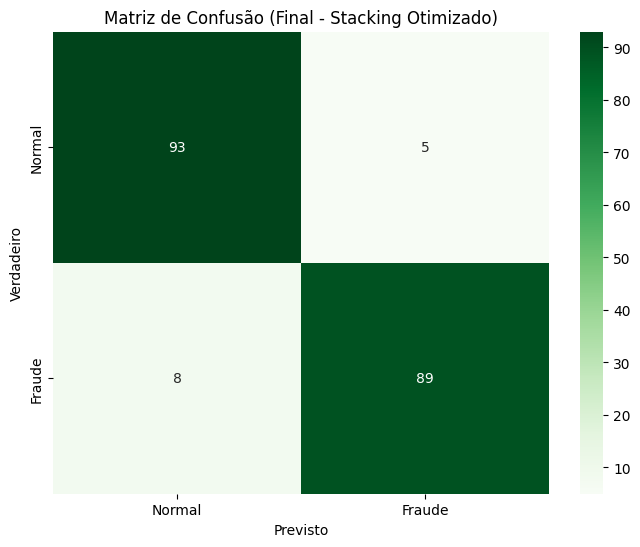

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


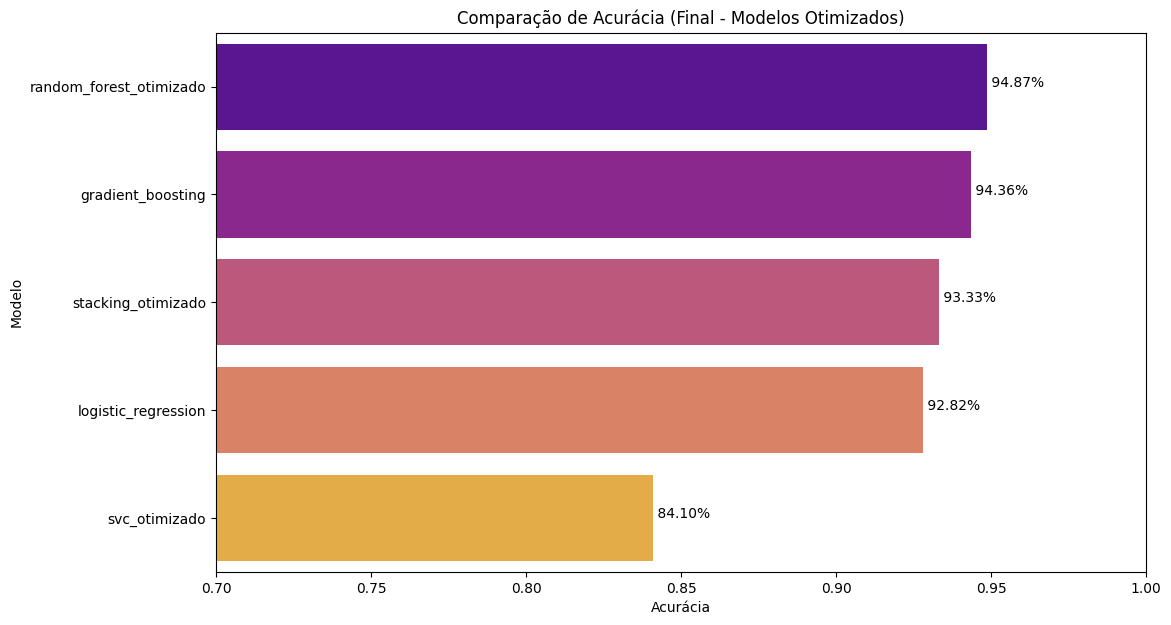

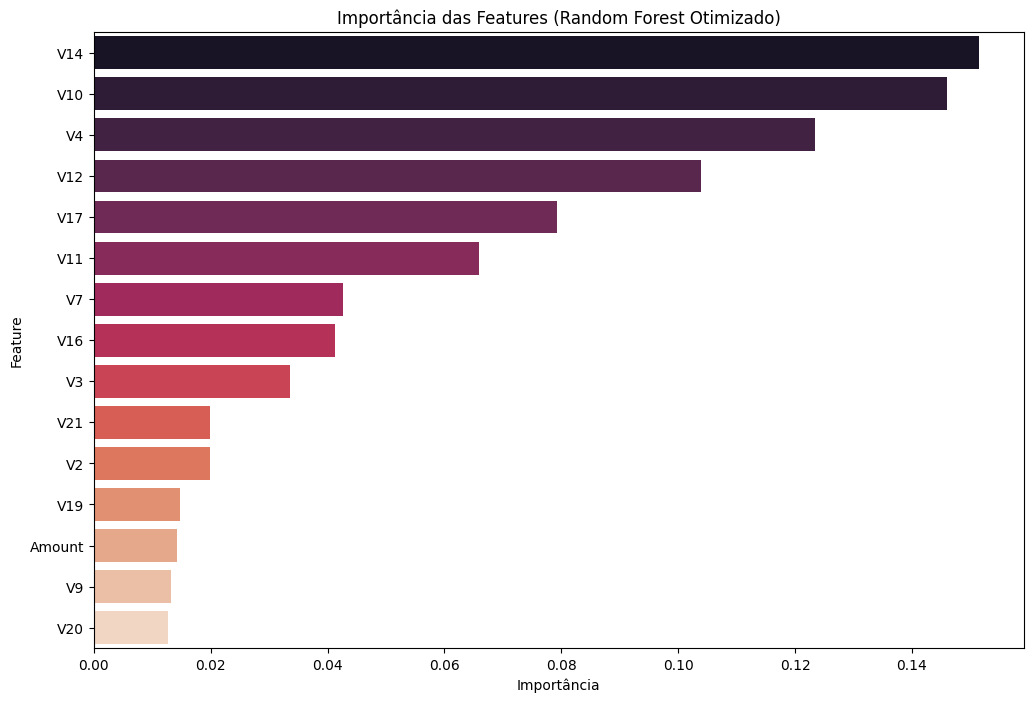

In [57]:
# --- GRÁFICOS E ANÁLISES FINAIS (APÓS OTIMIZAÇÃO) ---

print("\\n" + "="*50)
print("INICIANDO ANÁLISE VISUAL FINAL (MODELOS OTIMIZADOS)")
print("="*50 + "\\n")

# --- Gráfico 1: Matriz de Confusão (Modelo Final: Stacking Otimizado) ---

cm_final = confusion_matrix(y_test, y_pred_stacking_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Fraude'], yticklabels=['Normal', 'Fraude'])
plt.title('Matriz de Confusão (Final - Stacking Otimizado)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.savefig('confusion_matrix_final.png')
plt.show()

# --- Gráfico 2: Comparação de Acurácia dos Modelos (Otimizados) ---

# Precisamos primeiro coletar a acurácia dos modelos otimizados
model_accuracies_optimized = {}

# Reavaliando os modelos individuais com os melhores parâmetros
lr_final = LogisticRegression(max_iter=1000, random_state=42).fit(x_train, y_train)
model_accuracies_optimized['logistic_regression'] = accuracy_score(y_test, lr_final.predict(x_test))

# 'best_rf' e 'best_svc' já foram treinados pelo GridSearchCV
model_accuracies_optimized['random_forest_otimizado'] = accuracy_score(y_test, best_rf.predict(x_test))
model_accuracies_optimized['svc_otimizado'] = accuracy_score(y_test, best_svc.predict(x_test))

gb_final = GradientBoostingClassifier(random_state=42).fit(x_train, y_train)
model_accuracies_optimized['gradient_boosting'] = accuracy_score(y_test, gb_final.predict(x_test))

# Adicionando a acurácia do stacking otimizado
model_accuracies_optimized['stacking_otimizado'] = acc_stacking_optimized

# Criando o DataFrame e o gráfico
df_accuracies_final = pd.DataFrame(list(model_accuracies_optimized.items()), columns=['Modelo', 'Acurácia']).sort_values('Acurácia', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='Acurácia', y='Modelo', data=df_accuracies_final, palette='plasma', orient='h',hue='Modelo', legend=False)
plt.title('Comparação de Acurácia (Final - Modelos Otimizados)')
plt.xlabel('Acurácia')
plt.ylabel('Modelo')
plt.xlim(0.7, 1.0)
for index, value in enumerate(df_accuracies_final['Acurácia']):
    plt.text(value, index, f' {value*100:.2f}%')
plt.savefig('accuracy_comparison_final.png')
plt.show()


# --- Gráfico 3: Importância das Features (Random Forest Otimizado) ---

feature_importances_otimizado = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_otimizado.head(15), palette='rocket', orient='h', hue='feature', legend=False)
plt.title('Importância das Features (Random Forest Otimizado)')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.savefig('feature_importance_final.png')
plt.show()

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\joblib\_utils.py", line 72, in __call__
    return self.func(**kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\joblib\parallel.py", line 607, in __call__
    return [func(*args, **kwargs) for func, args, kwargs in self.items]
            ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\sklearn\utils\parallel.py", line 147, in __call__
    return se

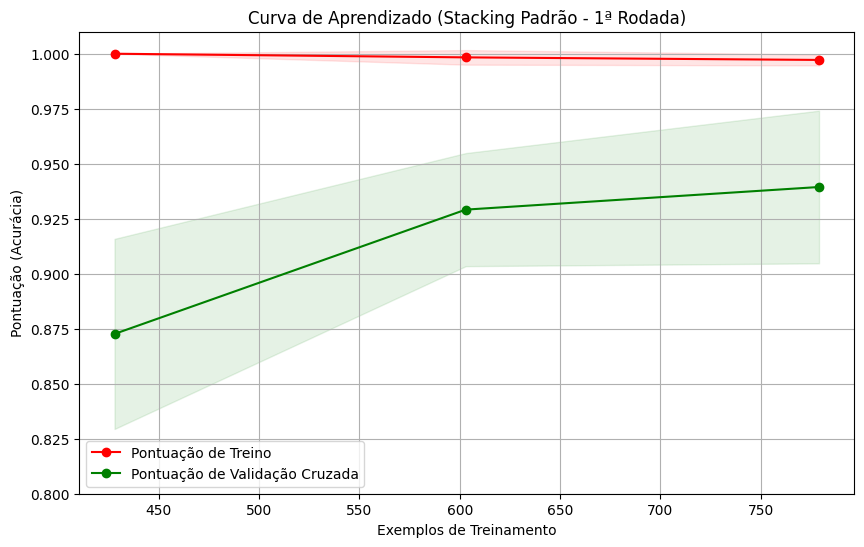

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\joblib\_utils.py", line 72, in __call__
    return self.func(**kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\joblib\parallel.py", line 607, in __call__
    return [func(*args, **kwargs) for func, args, kwargs in self.items]
            ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\sklearn\utils\parallel.py", line 147, in __call__
    return se

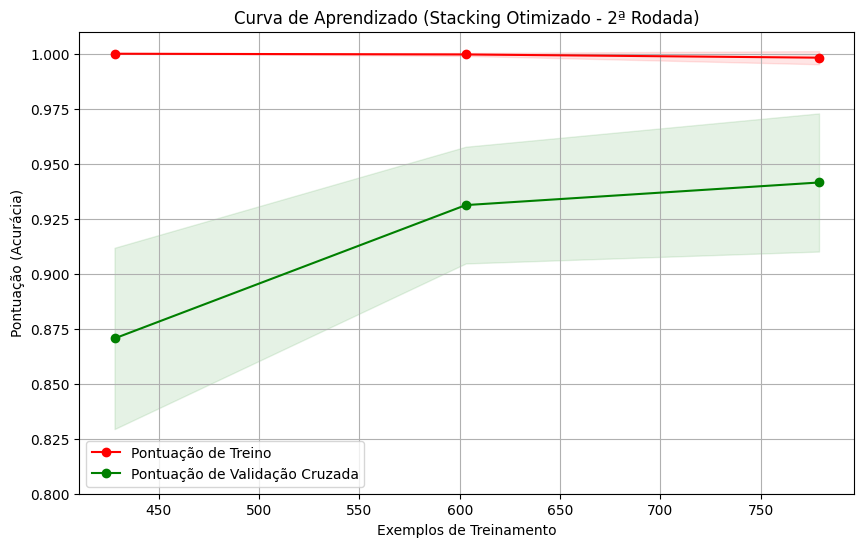

In [58]:
from sklearn.model_selection import learning_curve, StratifiedKFold

# --- Função para plotar a curva de aprendizado (sem alterações) ---
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemplos de Treinamento")
    plt.ylabel("Pontuação (Acurácia)")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Pontuação de Treino")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Pontuação de Validação Cruzada")

    plt.legend(loc="best")
    return plt

# Criando um objeto de validação cruzada estratificada
cv_stratified = StratifiedKFold(n_splits=5)

# --- Gerando a Curva de Aprendizado para a 1ª Rodada (Modelo Padrão) ---
title_round1 = "Curva de Aprendizado (Stacking Padrão - 1ª Rodada)"
# Passamos o objeto cv_stratified para o parâmetro cv
plot_learning_curve(stacking_model_padrao, title_round1, X, Y, ylim=(0.8, 1.01), cv=cv_stratified)
plt.savefig('learning_curve_round1.png')
plt.show()


# --- Gerando a Curva de Aprendizado para a 2ª Rodada (Modelo Otimizado) ---
title_round2 = "Curva de Aprendizado (Stacking Otimizado - 2ª Rodada)"
plot_learning_curve(stacking_model_optimized, title_round2, X, Y, ylim=(0.8, 1.01), cv=cv_stratified)
plt.savefig('learning_curve_round2.png')
plt.show()

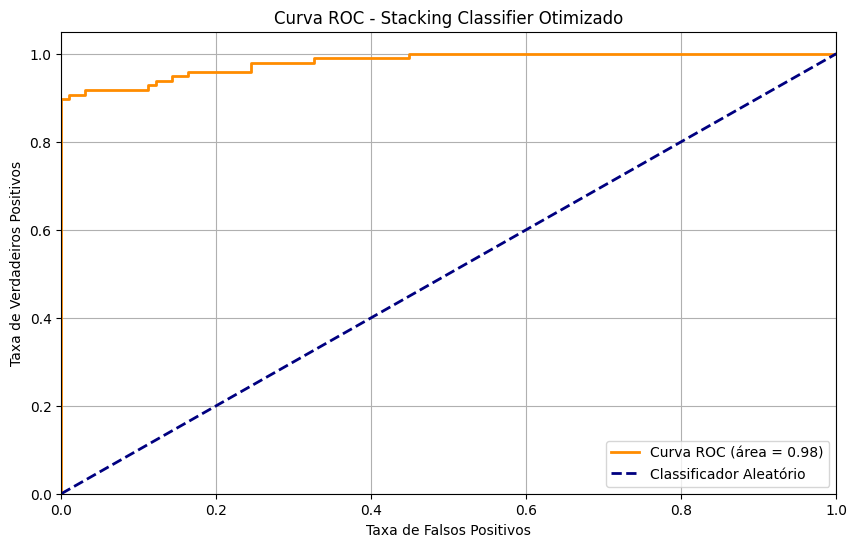

In [59]:
from sklearn.metrics import roc_curve, auc

# Prever as probabilidades para o conjunto de teste
y_pred_proba = stacking_model_optimized.predict_proba(x_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificador Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Stacking Classifier Otimizado')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('roc_curve_final.png')
plt.show()

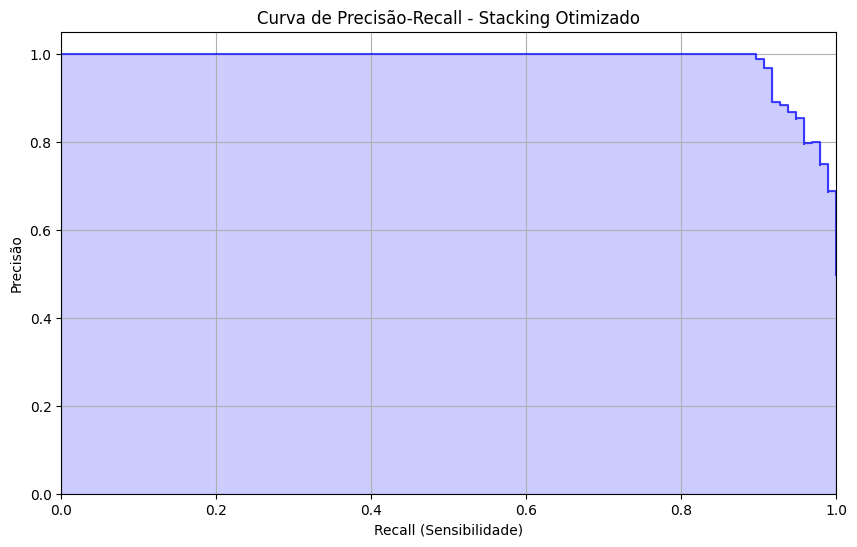

In [60]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calcular a curva de Precisão-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.step(recall, precision, color='b', alpha=0.7, where='post', label=f'Curva PR (AP = {avg_precision:.2f})')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall (Sensibilidade)')
plt.ylabel('Precisão')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva de Precisão-Recall - Stacking Otimizado')
plt.grid()
plt.savefig('precision_recall_curve_final.png')
plt.show()

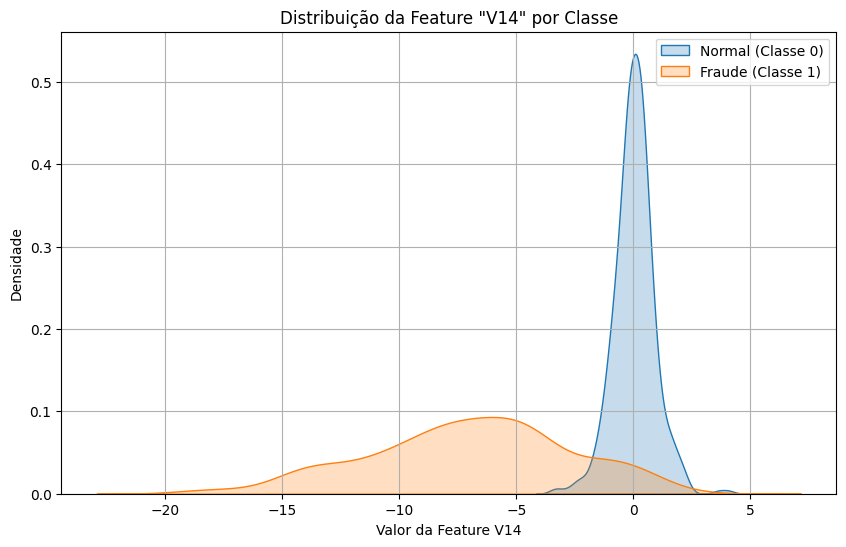

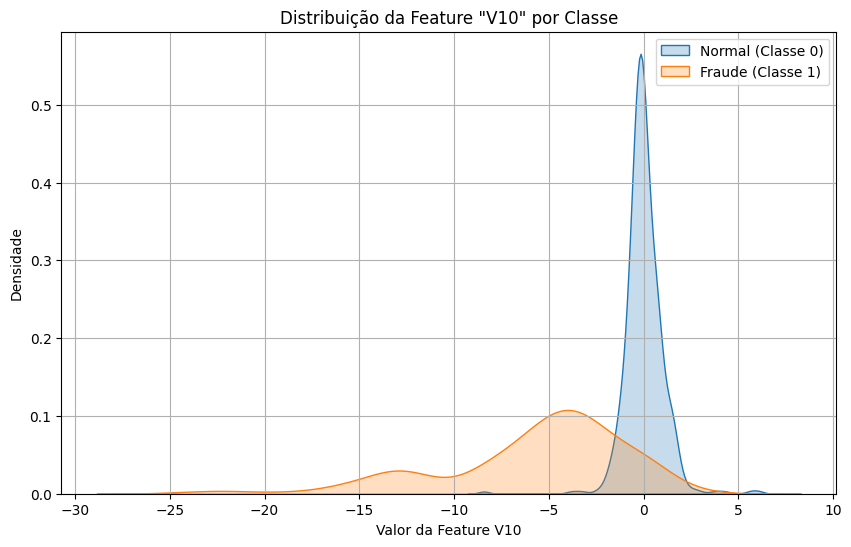

In [61]:
# Usando o DataFrame balanceado 'df_concatenado' para uma visualização mais clara
feature_importante = 'V14' # Feature mais importante identificada pelo RandomForest

plt.figure(figsize=(10, 6))
# A única mudança é aqui: shade=True foi trocado por fill=True
sns.kdeplot(df_concatenado[feature_importante][df_concatenado['Class'] == 0], label='Normal (Classe 0)', fill=True)
sns.kdeplot(df_concatenado[feature_importante][df_concatenado['Class'] == 1], label='Fraude (Classe 1)', fill=True)
plt.title(f'Distribuição da Feature "{feature_importante}" por Classe')
plt.xlabel(f'Valor da Feature {feature_importante}')
plt.ylabel('Densidade')
plt.legend()
plt.grid()
plt.savefig('feature_distribution_v14.png')
plt.show()

# Usando o DataFrame balanceado 'df_concatenado' para uma visualização mais clara
feature_importante = 'V10' # Feature mais importante identificada pelo RandomForest

plt.figure(figsize=(10, 6))
# A única mudança é aqui: shade=True foi trocado por fill=True
sns.kdeplot(df_concatenado[feature_importante][df_concatenado['Class'] == 0], label='Normal (Classe 0)', fill=True)
sns.kdeplot(df_concatenado[feature_importante][df_concatenado['Class'] == 1], label='Fraude (Classe 1)', fill=True)
plt.title(f'Distribuição da Feature "{feature_importante}" por Classe')
plt.xlabel(f'Valor da Feature {feature_importante}')
plt.ylabel('Densidade')
plt.legend()
plt.grid()
plt.savefig('feature_distribution_v10.png')
plt.show()